# Linear Regression model on Auto dataset

We will examine how the characteristics of the car relate to the price column, which will be our outcome. This column represents the average payment that an insurance company pays when a car of that particular row has an accident. We want to predict this price for other cars, so we'll use linear regression for this task.

## Exploratory Analysis

First we import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [5]:
# We will delete the rows with "?" as their is no clear mea, median
df = df[df['normalized-losses'] !='?']

In [6]:
df['normalized-losses'].value_counts()

normalized-losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          164 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               164 non-null    object 
 3   fuel-type          164 non-null    object 
 4   aspiration         164 non-null    object 
 5   num-of-doors       164 non-null    object 
 6   body-style         164 non-null    object 
 7   drive-wheels       164 non-null    object 
 8   engine-location    164 non-null    object 
 9   wheel-base         164 non-null    float64
 10  length             164 non-null    float64
 11  width              164 non-null    float64
 12  height             164 non-null    float64
 13  curb-weight        164 non-null    int64  
 14  engine-type        164 non-null    object 
 15  num-of-cylinders   164 non-null    object 
 16  engine-size        164 non-null

In [8]:
# check for null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# we will replace the "?" with nan so we can see them when checking for null
df.replace('?', np.nan, inplace=True)

In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

we will check all 3 columns with nan to decide how to replace them 

In [11]:
df['num-of-doors'].value_counts()

num-of-doors
four    95
two     68
Name: count, dtype: int64

In [12]:
df['bore'].value_counts()

bore
3.62    20
3.19    15
3.15    15
2.97    12
3.03    10
3.78     7
2.91     7
3.27     6
3.31     6
3.05     6
3.43     6
3.54     5
3.39     5
3.58     5
3.35     4
3.01     4
3.46     4
3.17     3
3.7      3
3.33     2
3.5      2
3.24     2
3.13     1
3.34     1
3.76     1
3.61     1
3.94     1
3.08     1
2.54     1
3.63     1
2.92     1
3.6      1
2.99     1
Name: count, dtype: int64

In [13]:
df['stroke'].value_counts()

stroke
3.03    14
3.15    14
3.4     13
3.23    12
2.64    11
3.29     9
3.39     9
3.46     8
3.5      6
3.35     6
3.41     6
3.07     6
3.58     6
3.27     6
3.54     4
3.64     4
3.19     4
3.47     3
3.52     3
3.11     3
2.8      2
3.08     2
3.1      1
3.16     1
2.19     1
3.21     1
2.07     1
2.36     1
4.17     1
3.9      1
2.87     1
Name: count, dtype: int64

Since replacing with the mean or median will not really be accurate and the rows with nan are few, we will delete them

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
# reset the index
df = df.reset_index(drop=True)

In [17]:
# change the type of some variables from object to float
df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm', 'price']].astype(float)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


Our Auto dataframe is now ready for Machine Learning

## Machine Learning

changing the categorical variables to dummy so we can find the correlation

In [19]:
categorical = ['make', 'aspiration', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system' ]

In [20]:
df_with_dummies = pd.get_dummies(df, columns = categorical)

In [21]:
df_with_dummies

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,True,False,False,False,False,False,False,True,False
1,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,True,False,False,False,False,False,False,False,True,False
2,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,True,False,False,False,False,False,False,False,True,False
3,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,True,False,False,False,False,False,False,False,True,False
4,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,True,False,False,False,False,False,False,True,False
155,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,True,False,False,False,False,False,False,True,False
156,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,True,False,False,False,False,False,True,False
157,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,True,False,False,False,True,False,False,False


In [22]:
# Convert dummy variables to 0 and 1
boolean_columns = df_with_dummies.select_dtypes(include=bool).columns

# Convert boolean columns to integers (0 and 1)
df_with_dummies[boolean_columns] = df_with_dummies[boolean_columns].astype(int)

In [23]:
df_with_dummies

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,1,0,0,0,0,0,0,1,0
1,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,0,0,0,0,0,0,0,1,0
2,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,1,0,0,0,0,0,0,0,1,0
3,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,1,0,0,0,0,0,0,0,1,0
4,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,1,0,0,0,0,0,0,1,0
155,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,1,0,0,0,0,0,0,1,0
156,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,1,0,0,0,0,0,1,0
157,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,1,0,0,0,1,0,0,0


We will find the top 5 columns with the highest correlation to normalized-losses

In [24]:
correlations = df_with_dummies.corr()['price'].abs().sort_values(ascending=False)
top_7_correlated_columns = correlations[1:8].index.tolist()
top_7_correlated_columns

['curb-weight',
 'width',
 'engine-size',
 'length',
 'horsepower',
 'wheel-base',
 'highway-mpg']

we will use only the above features along with price for our Linear regression model

In [25]:
# We then split our data into X and y
X = df_with_dummies[['curb-weight', 'width', 'engine-size', 'length', 'horsepower', 'wheel-base', 'highway-mpg']]
y = df_with_dummies['price']

In [26]:
scaler = MinMaxScaler()

In [27]:
x = scaler.fit_transform(X)

In [28]:
# Using train test split for our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=726)

## Build the model

We will scale our values first before proceeding

In [29]:
scaler = MinMaxScaler()

In [30]:
model = LinearRegression()

In [31]:
# Training and checking model performance on training set
model.fit(X_train, y_train)

LinearRegression()

In [32]:
train_pred = model.predict(X_train)

In [33]:
mean_squared_error(y_train, train_pred)

5435727.546838915

we will set squared to false so we can easily interpret the error

In [34]:
train_rmse =  mean_squared_error(y_train, train_pred, squared = False)
train_rmse

2331.4646784454862

In [35]:
# Coefficient of determination
r2_score(y_train, train_pred)

0.847337616126095

### Comments

The training MSE for the model is 5435727. This indicates that the model can explain 84% of the variation in the car prices. These preliminary results are promising, but we must remember that these are optimistic values.

### Residual Diagnostics

<AxesSubplot:xlabel='fitted', ylabel='residuals'>

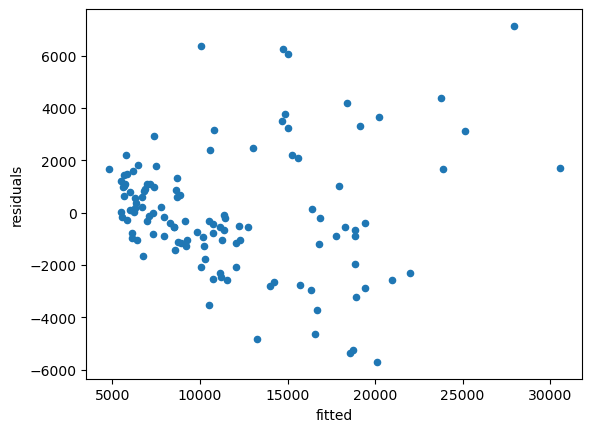

In [36]:
# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - train_pred
check["fitted"] = train_pred

check.plot.scatter(x = "fitted", y = "residuals")

The residuals is looking good as they are mostly centered around 0, meaning there is a linear relationship

### Interpreting The Model

In [37]:
# Getting the non-intercept coefficients
model.coef_

array([  5.2862077 , 800.97328532,  43.89895629, -94.33944365,
        25.64406651,  97.53741006, -29.96026634])

### Final Model Evaluation

In [38]:
# Getting MSE on test model
test_pred = model.predict(X_test)

In [39]:
mean_squared_error(y_test, test_pred)

6635053.50380007

In [40]:
# Coefficient of determination
r2_score(y_test, test_pred)

0.7773264743513635

# Conclusion

The MSE for both training and test data are pretty high, Their R score is quite good with 84% for training and 77% for test data suggesting quite a good model, The residuals sugest this is quite a balanced model

We can further improve the models by increasing features changing parameters, using a different model, etc